## Logistic Regression

Logistic regression, bir classification algoritmasıdır.

Logistic regresison genelde 0 ve 1 sonucu verir. Bu durum binary classification'dır. Mesela kedi ve köpek olmak üzere iki sınıf olması durumunda bu binary classification'dur. Kedi ve Köpek sınıflarını 0 ve 1 şeklinde temsil edebiliriz.

Birde şunu belirtmek gerek ki, veri setindeki veriler birer resim ise bu resimler piksellerden oluşur ve logistic regression modeline resmi öğretebilmek için her bir resimdeki piksel değerlerini bir numpy array'e depolarız. Yani data'yı bir numpy array'e çevirmeliyiz.

Artificial neural network, convolutional neural network aslında bir deep learning'tir. Logistic regression'da basit bir neural network'tür.

## Computation Graph

Logistic regression, Convolutional Neural Network, Artificial neural network, Recurrent neural network gibi konuları daha kolaylıkla anlamak için kullandığımız bazı grafikler var ve bunlara computation graph denir.

Computation Graph, matematiksel ifadeleri görselleştirmek için kullandığımız bir yöntemdir.

c = √ a^2 + b^2

Bu matematiksel ifadenin computation graph ile görselleştirilmiş hali şu şekildedir:

<img src="computation_graph.png" style="width:600px;height:300px"/>

Böylelikle karekök alan bir graf elde edilmiştir.

Şimdi de logistic regression'un computation graph'ına bakalım.

<img src="log_computationn.png" style="width:900px;height:500px"/>

Yukarıdaki görsel üzerinden anlatalım.

Amacımız modeli test ya da train etmektir. Veri setinde işaret diline dair görseller bulunmaktadır. Her bir resim 4096x1 boyutunda array'dir. 1-DeepLearningandDataSetIntroduction isimli dökümanda görsel üzerinde X_train(images) kısmında görebilirsiniz. 

Mavi yuvarlaklar resimdeki her bir pikseli ifade eder. Pikseller, eğer resim bgr ise renk tonlarına göre 0 ile 255 arasında, gri ise renk tonlarına göre 0 ile 1 arasında sayısal değerlerdir. Toplamda 4096 tane piksel bulunmakta. Bu pikselleri, veri setindeki feature'ler yani sütunlar olarak düşünebiliriz.

Train etmek, resmi modelimize uydurmak anlamına gelir. Görselde görüldüğü üzere 4096 tane pixel bulunmaktadır. Yani aslında 4096 tane feature vardır. Her bir pikseli farklı ağırlık değerleri ile çarpıyoruz. Sonra bu çarpımlar sonucunda elde edilen tüm değerler toplanır. Toplam sonucuna birde bias değeri eklenir. Tüm bu işlemlerin sonucunda bir z değeri elde edilir.

z = b + px1w1 + px2w2 + ... + px4096*w4096

Sonrasında z değerine sigmoid function uygulanıyor.

Sigmoid function, değeri 0 ile 1 arasında bir değere çeker.

z değerine sigmoid function uygulanması ile tahmin edilen y_head değeri elde edilir ve y_head değeri 0 ile 1 arasında probabilistic değerdir.

Mesela tüm bu işlemlerin ardından 0.9 değerini elde edelim. Threshold değeri 0.5 tir ve 0.5'in üzerindeki değerler 1, 0.5'in altındaki değerler 0 olsun diyoruz. 0.9 değeri 0.5 değerinden büyük olduğuna göre sonuç olarak 1 çıktısı elde edilir. Yani resim üzerindeki işaret 1'dir tahmini sağlanmıştır.

Ayrıca weight ve bias değerleri güncellenmelidir çünkü burada bir resim için eğitim yapılmıştır ve veri setindeki geri kalan her bir resmin eğitimi için w ve b değerleri güncellenmelidir. Bu güncelleme işlemi sigmoid fonksiyonunun türevinin alınması ile yapılır.

Modelde öğrenilen şeyler weight ve bias değerleridir.

Mesela başlangıçta tüm w değerleri 0 ve b değeride 0 olsun. Bu durumda z=0 elde ederiz. 0<0.5 olduğuna göre 0 sonucu elde edilir ama resimdeki işaret 1'dir. Dolayısıyla yanlış tahmin yapılmıştır. Bu durumda geriye doğru gidilir. Sigmoid fonksiyonunun türevi alınır ve türevini alarak bias ile weight değerlerini güncelliyoruz. Sonra diğer resim alınır ve piksel değerleri güncellenmiş weight değerleri ile çapılırarak tüm sonuçlar toplanır ve güncellenmiş bias değeri bu toplamm sonucu ile toplanır sonra bu sonuca sigmoid fonksiyonu uygulanır ve son sonuç elde edilir. Mesela bu sefer de tahmin doğru olsun. Sonrasında tekrar güncelleme işlemleri yapılmalıdır. Tekrar sigmoid fonksiyonunun türevi alınır, sigmoid fonksiyonun geri kalan kısmında gördüğünüz lineer işlemlerin türevi alınır ve weight ve bias güncellenir.

Böylece weight ve bias değerlerini sürekli güncelleyerek tüm resimler eğitilir. En sonunda elde edilen weight ve bias değerleri, tüm resimlere göre eğitilmiş olan logistic regression modelinin katsayıları ve bias değeri oluyor.

Şunuda belirtmek gerek ki, sigmoid function türevi alınabilen bir fonksiyon olduğu için w0,w1 gibi değerleri güncelleyebiliyoruz. Türevi alınamayan bir fonksiyon kullanılsaydı weight ve bias değerleri güncellenemezdi.

## Initializing Parameters

Model, weight ve bias değerlerini öğrenir. Weight her bir pikselin katsayısıdır. Yani weight hangi pikselin ne kadar öneme sahip olduğunu ifade eder.

Weight ve bias parametrelerdir. Bu parametrelerin ilk değerlerini seçebilmek için bazı teknikler vardır. Bu teknikleri artifical neural network kısmında inceleyeceğiz. 

Şimdilik genelde literatürde bu değerlerin kullanılmasından dolayı weight için başlangıç değerini 0.01 olarak ve bias değerini 0 olarak seçelim.

Weight değerini 0 değilde 0.01 seçme sebebimiz, eğer 0 seçseydik weight'ler ve bias öğrenemezdi. Yani sonuca ulaştıktan sonra weight ve bias değerlerinin güncellenmesi için geriye dönüldüğünde weight değerleri 0 olduğunda güncellenecek bir şey olmadığından güncelleme gerçekleşemez.

## Forward Propagation

Pikseller ile cost function arasındaki işlemlerin toplamına Forward Propagation denir. İleriye doğru gitmek şeklinde düşünebiliriz.

z değeri, resmin piksellerinin ağırlıkları ile çarpımı sonucunda tüm değerlerin toplanıp, bu toplam değeri ile de bias değerinin toplanması sonucunda elde edilir. Sonrasında forward propagation devam ediyor ve z değeri sigmoid function içerisine koyularak 0 ile 1 arasında bir değer elde edilir ve sonrasında y_head (probability) değeri elde edilir. 

Sonrasında loss(error) function hesaplanır.

<font color="LightSeaGreen"><br>
LOSS FUNCTION:

<img src="loss.jpg" style="width:400px;height:90px"/>

Loss function matematiksel formülü yukarıda gördüğünüz gibidir.

Gerçek değer ile tahmin edilen değer aynı ise loss değeri 0'dır. Gerçek değer ile tahmin edilen değer farklı ise oldukça büyük bir loss değeri elde edilir.

Loss = hata = kayıp ➡️ Bunlar aynı ifadelerdir.

<font color="MediumOrchid"><br>
COST FUNCTION: Her bir resim için bir loss function değeri vardır ve bu loss function değerlerinin hepsinin toplamı cost function değeridir. Yani tüm hataların toplamı cost function değeridir. Eğer cost function değeri yüksek ise modelin iyi olduğu söylenemez. Bu durumda weight değerleri yanlıştır ve bu değerlerin güncellenmesi gerekir.

Logistic regression'un computation graph'ında bir resim için forward propagation tamamen gerçekleştirilsin. Yani baştan sona işlemler yapılsın. Sonrasında loss fonksiyonuna elde ettiğimiz y_head değerini (tahmin edilen değer) ve y değerini (ilk baştaki gerçek değer) vererek, loss function değerini elde ederiz.

Bu bir resim için yapılmıştır. Sonrasında aynı şekilde ikinci resim için de loss function değeri elde ederiz ve böylece ikinci resim için de forward propagation'u tamamlamış oluruz. Diğer resimlere de forward propagation yapmalıyız.

Tüm resimler için forward propagation'u nasıl yapabiliriz? :

Her bir resmi for döngüsü içerisine alarak yapabiliriz fakat for döngüsü çok zaman aldığı için çalışma zamanı açısından kullanışlı bir yöntem değildir.

Bir diğer yöntem ise, bir numpy array'in satırları pikselleri, sütunları resimleri ifade edecek şekilde ayarlarız. Yani bir matrisi bir kerede forward propagation yaparak her bir resim için bir loss değeri elde ederiz. Sonra tüm bu elde edilen loss değerlerini toplayarak bir tane cost değeri elde ederiz. Eğer cost değeri yüksek ise modelin doğru olmadığını anlarız. Bu durumda weight değerlerini ve bias değerini cost function'a göre güncelleriz.

Amaç weight değerlerini ve bias değerini güncelleyerek cost function değerini azaltmaktır.

Weight değerlerini ve bias değerini güncelleme işlemine Backward Propagation denir. Yani en sondan en başa doğru gitmeye Backward Propagation denir.

Gradient Descent algoritmasını kullanarak weight ve bias değerlerini optimize edeceğiz. Yani weight ve bias için cost'a göre en uygun değerleri bulacağız.

## Backward Propagation

Başlangıçta weight ve bias 'a atadığımız değerlerin yanlışlığı sonucunda yüksek bir cost değeri elde ederiz. Bu durumda weight ve bias değerlerini, cost fonksiyonunu azaltacak şekilde güncellemeliyiz. Backward Propagation süreci, cost funciton'dan başlayarak geriye doğru gidilmesi ve weight ve bias değerlerinin güncellenmesidir.

Backward Propagation yaparken kullanılan metod Gradient Descent'tir.

## Optimization Algorithm with Gradient Descent

Cost function değerinin en az olmasını sağlsayan weight ve bias değerlerini bulmalıyız. Yani cost function değerini en az yapacak optimize parametreleri bulmalıyız.

Eğer hataların toplamı çok ise bu yanlış tahmin yapıldığı anlamına gelir. Çünkü hata fonksiyonunu doğru ya da yanlış yaptığımız tahminler oluşturur. Eğer yanlış tahmin yapılmış ise hata değeri yüksek, doğru tahmin yapılmış ise hata değeri düşüktür.

Cost değeri weight ve bias parametrelerinin değerlerine bağlıdır. Dolayısıyla cost değerini azaltmak için weight ve bias değerlerinin güncellenmesi gereklidir.

Model, weight ve bias parametlerini öğrenmeli ve sonucunda bu parametreler cost'u azaltır.

<img src="gradient.png" style="width:600px;height:400px"/>

Yukarıdaki grafiği inceleyelim. bias=0 olarak düşünün. x ekseni weight, y ekseni cost değerini ifade etmekte. Cost fonksiyonunun minimum değeri her zaman 0 olamaz. Ama minimum bir değeri vardır.

Weight değeri 5 iken cost değeri 1.5'tir. Eğer weight değerleri 5 ise forward propagation yaptıktan sonra cost fonskiyonunun değeri 1.5 oluyormuş. Görselde gördüğümüz gibi weight değerini azaltırsak, min cost'a doğru ilerlemiş oluruz.

w := w - step ifadesinin anlamı, w değerlerini güncelle demektir. Weight değerinden step'i çıkararız ve elde edilen yeni değer güncel w değeridir.

Step: weight değeri 5 ve cost değeri 1.5 olan kırmızı çizgi üzerindeki siyah noktanın kestiği line, bu noktanın bu fonksiyona göre eğimidir. Bu eğim step'tir.

slope1 değeri mesela 3 olsun ve weight değerinin güncellenmesi sonucunda yeni weight değeri 5-3=2 olur. Cost değeri bir önceki adımdaki değere göre daha küçük ama henüz minimum noktada değil. Dolayısıyla bir kere daha forward propagation yapalım.

Bu sefer cost değeri 0.4 oldu. Fakat yine cost değeri minimum değil. Dolayısıyla bir step daha ilerleriz.

slop22 = 0.7 'dir. 2-0.7=1.3 (w-slope2) elde edilir. Yani yeni weight değerleri 1.3'tür. Ve cost değeri 0.3'tür. Minimum cost değeri budur fakat bu değerin minimum olup olmadığı algoritma tarafından bilinmiyor. Şekilde görebiliyoruz ama gerçekte minimum olup olmadığını bilemeyiz. Dolayısıyla bir kere daha türev alırız.

Slope3=0.01 'dir. 1.3-0.01=1.29 (w-slope3) elde edilir. 1.29 değeri neredeyse 1.3 (w) 'e eşittir. Yani slope3 neredeyse 0 yani burada neredeyse değişim yoktur.

<font color = "DodgerBlue"><br>
Değişim yok ise minimum noktaya ulaşılmış demektir.
    
En son güncellemede weigth değeri değişmedi. Dolayısıyla cost fonksiyonunun minimum noktasını bulmuş olduk.
    
Bir grafiğin bir noktaya göre türevini alırsak, o grafiğin o noktaya göre eğimini bulmuş oluruz.
    
Yani burada cost fonksiyonunun weight'e göre eğimini bulduk. Eğer cost için minimum değerdeysek, eğim (slope) 0 'dır.

<font color = "LimeGreen"><br>    
Bir fonksiyonun bir noktaya göre türevi, o fonksiyonun eğimini verir. Yani minimum cost değerini bulabilmek için o fonksiyonun o noktaya göre türevini sıfıra eşitlemeliyiz. Artık weight değeri değişmiyor ise minimum cost değerine ulaşılmış demektir.
    
Tüm bu işlemler bias içinde aynıdır.

<img src="cost.png" style="width:400px;height:200px"/>

Yukarıdaki formülü açıklayalım. Burada J cost fonksiyonudur. b=0 olduğundan burada cost fonksiyonunun weight'e (w) göre türevinin alınması söyleniyor. Yani aslında bu formül w := w - step ifadesi ile aynıdır.

Formülde α işareti, learning rate 'dir. Learning rate, öğrenme hızı, öğrenme oranı olarak nitelendirilir.

Mesela Paris'teyiz ve Madrid'e gitmek istiyoruz. Bizim hızımız (learning rate) küçüktür. Bu durumda Madrid'e çok yavaş gideriz ve çok uzun zaman alır. Eğer hızımız (learning rate) çok yüksek ise de hiçbir zaman Madrid'e gidemeyebiliriz çünkü kaza yapabiliriz. Bu yüzde hız için (learning rate) en uygun değeri seçmeliyiz.

w ve b güncellenebilen parametrelerdir. α ise hyperparameter'dir. Yani önce α değerini seçeriz ve sonrasında bu değeri değiştirerek ayarlarız.

<font color = "Orange"><br>  
Learning rate değeri çok büyük olmamalı ve çok küçük de olmamalıdır. Learning rate değerini seçmek için denemek zorundayız.
    
Genelde başlangıçta learning rate değeri 0.01 seçilir.

Backward propagation ile geri giderken weight ve bias değerlerini, cost fonksiyonun weight ve bias'a göre türevini alarak güncelleriz. Türevi almak eğimi bulmak demektir. Eğer eğim yüksek ise min cost değerinden uzağız demektir, eğer eğim 0 ise min cost değerindeyiz demektir.

Weight ve bias değerlerini yukarıdaki formüle göre güncelleriz.

<img src="cost_grafik.png" style="width:700px;height:400px"/>

Cost değerinin değişimlerini grafikte görmekteyiz. Cost değeri başlangıçta 14 çıkmış ve sonrasında giderek 0'a yaklaşmış.

Yani backward ve forward'lar arttıkça cost değeri giderek 0'a yaklaşmıştır.

Grafikte gördüğünüz üzere cost değeri 0'a çok yaklaşmış ve artık azalmamaya başlamış dolayısıyla bu noktada durdurulmuştur.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

"""
Algoritmalara güncelleme geldiği zaman, eski modu kullandığımıza dair uyarılar verilebiliyor. Bu uyarıları görmemek için 
aşağıdaki kodu yazarız:
"""

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

(-0.5, 63.5, 63.5, -0.5)

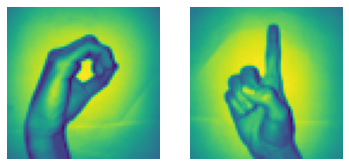

In [2]:
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [3]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]  #train sample sayısı number_of_train değişkenine atanmıştır.
number_of_test = X_test.shape[0]   #test sample sayısı number_of_test değişkenine atanmıştır.

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [7]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

Yukarıdaki kod bloğunda python'da metodun nasıl tanımlandığına dair bir hatırlatma yapılmıştır.

Şimdi ise parametreleri initialize edelim.

In [8]:
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

Pikselleri weight'lerle çarpmak ve bias ile toplamak için weight'lerin ve bias'ın başlangıç değerlerine sahip olması lazım. Bu başlangıç değerlerini seçerken hem eğitime dayanarak hemde sezgisel bir şekilde weight'lere 0.01 değerini ve bias'ada 0 değerini atarız.

4096'lık bir array'e ihtiyaç vardır. Çünkü 4096 tane piksel vardır ve bunları weight'lerle çarpacağımız için 4096 tane weight'e ihtiyaç vardır.

Yukarıdaki kod bloğunu açıklayalım. dimension isimli parametre, bir resmin boyutunu ifade etmektedir. Yani dimension=4096'dır. 

w = np.full((dimension,1),0.01) satırında yapılanlar: full(), numpy kütüphanesinin bir metodudur. (dimension,1)'lik yani 4096,1 'lik matris oluşturuluyor. Bu matrisin içerisine 0.01 sayısı konulmuştur. Sonuç olarak weight, 4096x1 'lik 0.01 sayılarıyla dolu bir matristir.

b = 0.0 satırı ilede bias 0'a eşitlenmiştir.

In [9]:
w,b = initialize_weights_and_bias(4096)

Forward propagation metodunun içerisinde z değerini bulacağız. Ayrıca birde sigmoid function'u bulmalıyız. Sigmoid function metodunu yazalım.

In [10]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

Sigmoid fonksiyonunu yazdığımıza göre y_head kısmına geçebiliriz. Bunun için forward propagation metodunu yazmalıyız.

## Implementing Forward Propagation

In [11]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

Forward propagation, weight'ler ile pikseller çarpılıp elde edilen çarpımlar toplanır ve bu toplam sonucu ile bias değeri toplanır ve bir z değeri elde edilir. Bu z değeri sigmoid'e verilir ve daha sonra sigmoid'den çıkan sonuç bir loss function'a eşitlenir ve tüm loss değerleri toplanarak cost değeri elde edilir.

Şimdi cost değerine göre geriye dönüp weight ve bias değerleri güncellenir. Yani Backward propagation yapılır.

## Implementing Backward Propagation

In [12]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

Yukarıda forward propagation ve backward propagation kodlarını görmekteyiz. backward propagation ile elde edilen weight ve bias değerleri güncellenir.

derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]

Bu satırda, x_train.shape[1] ile sample sayısına erişilir ve burada sample sayısına bölüm yapılmıştır. Bunun sebebi, scale etmektir. Scale edilmediğinde belli bir yere kadar değerler çok büyük çıkar ve dolayısıyla scale etmek avantaj sağlar.

## Implementing Update Parameters

Artık cost'a göre weight'leri ve bias'ı güncelleyeceğimiz adımları, stepleri, slope'yi ya da değişimi biliyoruz. Dolayısıyla update kısmına geçebiliriz.

In [13]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

Model weight ve bias değerlerini öğrenmeye çalışır. Bu yüzden cost değerinin yüksek olması durumunda weight ve bias değerleri güncellenir. Amaç düşük bir cost değeri elde etmektir.

cost_list, cost_list2, index isimli boş listeleri oluşturma sebebimiz, cost ve indeksleri depolayıp sonrasında görselleştirme için kullanacağız.

for i in range(number_of_iterarion) satırındaki number_of_iterarion, backward ve forward propagation'u kaç kez yapacağımızın bilgisidir. Bir kez ileriye gidilerek forward yapılıyor, geriye dönülüyor backward yapılıyor ve daha sonra gradient descent metodu ile weight'ler güncelleniyor. for'un her bir iterasyonunde bir kez forward ve bir kez backward yapılmaktadır. 

Mesela number_of_iterarion=100 ise weight (w) ve bias (b) değerlerini 100 kez güncellemiş oluruz. Yani daha çok öğrenilmiş olur.

cost,gradients = forward_backward_propagation(w,b,x_train,y_train) satırında gradients değişkeninde tutulan değerleri değişim yani türevler olarak düşünebiliriz. İleride metod işe yarıyor mu yaramıyor mu diye test ederken cost'u görselleştiricem ve beklentimiz cost'un azalan yönde olmasıdır.

w = w - learning_rate * gradients["derivative_weight"] satırında weight değeri güncellenmektedir.

b = b - learning_rate * gradients["derivative_bias"] satırında bias değeri güncellenmektedir.

derivative_weight ifadesi weight'in türevidir ve derivative_bias ifadesi bias'ın türevidir. learning_rate, öğrenme hızıdır.

if i % 10 == 0:

            cost_list2.append(cost)
            
            index.append(i)
            
            print ("Cost after iteration %i: %f" %(i, cost))
            
Bu satırlarda her 10 iterasyonda bir cost değeri depolanmaktadır. Çünkü tüm cost değerlerini print etmek gereksiz zaman kaybı olacaktır.

parameters = {"weight": w,"bias": b}

    plt.plot(index,cost_list2)
    
    plt.xticks(index,rotation='vertical')
    
    plt.xlabel("Number of Iterarion")
    
    plt.ylabel("Cost")
    
    plt.show()
    
Yukarıdaki satırlarda ise print ettiğimiz cost'ları görselleştiriyoruz.

Böylelikle optimum noktaya sahip minimum cost değerini veren weight ve bias değerlerine sahibiz. Modelimiz hazır olduğuna göre artık tahminler yapabiliriz.

## Implementing Prediction

In [14]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Y_prediction = np.zeros((1,x_test.shape[1])) satırında prediction array'i oluşturduk. Array oluşturma sebebimiz, yer ayırmaktır. Bu amaç için sıfırlardan oluşan bir array oluşturduk. append metodu ile listenin sonuna ekleme yapılabilir. Fakat zaman karmaşıklığı açısından efektif olmayacaktı. Dolayısıyla burada appen metodu kullanmak yerine, Y_prediction isimli bir array tanımladığımız için direk istenilen indekse ulaşılabilir. Buda zaman açısından hızlanmaya sebep olur.

for i in range(z.shape[1]) satırında tüm z'nin dolaşılması sağlanır. For içerisindeki if bloğunda eğer z'nin mevcut iterasyondaki değeri 0.5'ten küçük ise tahmin 0 yapılır. Else koşulunda eğer z'nin mevcut iterasyondaki değeri 0.5'ten büyük ise tahmin değeri 1 yapılır.

Yukarıda z olarak tanımlanan değişken aslında y_head değeridir. Değişken ismi oluştururken ufak bir yanlışlık olmuştur. Buradaki z değişkenini y_head olarak düşünelim.

return Y_prediction satırında tahmin edilen değerler döndürülmüştür. Böylelikle tahmin işlemi gerçekleştirilmiştir.

Şimdi hazırladığımız tüm metodları logistic regression adı altında birleştirelim.

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


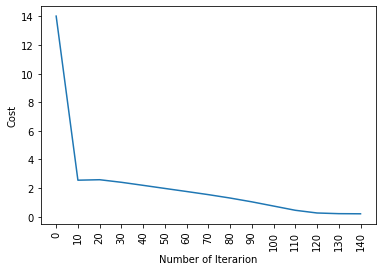

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [15]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

dimension değişkeni satır sayısıdır yani kaç tane piksel olduğu bilgisidir. Burada dimension değeri 4096'dır.

w,b = initialize_weights_and_bias(dimension) satırında logistic regression'un ilk adımı olan weight ve bias initialize edilmiştir.

Sonrasında forward propagation ve backward propagation yaparak weight'leri ve bias'ları güncellemeliyiz. Bunun için update metodu yazmıştık. update metodu içerisinde forward ve backward propagation kısmı yapılıyor ve aynı zamanda weight ve bias değerleri güncelleniyor.

Çıktıda görüldüğü üzere cost değeri giderek azalmaktadır.

Bu yaptığımız işlemleri sklearn kütüphanesi aracılığıyla bir kaç satırda yapabilmemiz mümkündür. Hadi yapalım.

In [16]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


Yazdığımız logistic regression metodundan elde ettiğimiz accuracy değeri ile sklearn kütüphanesi aracılığıyla ayaptığımız logistic regression metodundan elde ediken accuracy değeri farklı çıkabilir. Bunun sebebi, sklearn kütüphanesindeki LogisticRegression metodunun içerisinde farklı parametreler var ve bu parametrelerin default değerleri var. Bu parametreler modelin iyileşmesini sağlarlar. Bu yüzden görüldüğü üzere sklearn kütüphanesindeki LogisticRegression metodu ile elde edilen accuracy değeri daha yüksektir.